# 1. Módulo Projeto Python: Projeto final

# 2. Descrição do problema



*   
Neste projeto, nos propomos a explorar uma base de dados de crédito no formato CSV, que contém informações vitais sobre os clientes de uma instituição financeira. Entre todas as colunas disponíveis, destaca-se a 'default', fundamental para uma análise aprofundada, pois nela encontramos a distinção entre clientes adimplentes e inadimplentes. Esta distinção nos permite compreender os motivos pelos quais os clientes deixam de cumprir com suas obrigações financeiras, baseando-nos especialmente em variáveis como salário anual, nível de escolaridade e padrões de movimentação financeira. Ao explorar essa interação entre os diferentes atributos dos clientes e seu comportamento de pagamento, buscamos obter insights valiosos que contribuam para uma gestão mais eficaz do crédito e uma melhor compreensão dos riscos associados à concessão de empréstimos.



# 3. Importação de bibliotecas



*   Pandas (utilizada na manipulação e exploração de dados)



In [1]:
import pandas as pd

# 4. carregamento dos dados




*   O arquivo **dados.csv** foi baixado no material do curso para a minha máquina local e posteriormente importado aqui no Google Colab para a realização da tarefa.
*   O método **na_values='na'** irá fazer com que o pandas identifique todos os dados faltantes na base de dados e adicionará o valor na nos mesmos.



In [2]:
df = pd.read_csv('/kaggle/input/dataset-de-clientes-adimplentes-e-inadimplentes/dados.csv', na_values='na')

# 5. Exploração de dados

In [3]:
df.head(n=500)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,716920908,0,52,M,4,ensino medio,casado,$80K - $120K,blue,42,6,0,1,"5.738,38","1.922,73",48
496,708095133,0,43,M,4,NaN,NaN,$120K +,blue,34,5,2,2,"33.304,71","1.448,54",29
497,711195558,0,59,M,1,graduacao,solteiro,$40K - $60K,blue,48,6,3,3,"7.251,60","1.300,15",36
498,772735758,0,44,M,1,NaN,casado,NaN,blue,34,6,0,2,"2.885,65","1.366,50",31




*   O método **df.info()** é responsável por listar todas as colunas da base de dados, juntamente com seus respectivos tipos de dados. Entretanto, ao executar este método, podemos observar um erro nos tipos de dados das colunas 'limite_credito' e 'valor_transacoes_12m'. Ambas são apresentadas como tipo 'object', quando na verdade deveriam ser do tipo 'float'.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [5]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [6]:
df.shape # retorna uma tupla (qtd linhas, qtd colunas)

(10127, 16)



*   O item 'default' da tabela significa clientes adimplentes '0' ou inadimplentes '1'



In [7]:
df[df['default'] == 0].shape

(8500, 16)

In [8]:
df[df['default'] == 1].shape

(1627, 16)

In [9]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [10]:
print(f"A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%




*   Atributos **categóricos**



In [11]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3




*   Atributos **numéricos**



In [12]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


# 6. Limpeza e transformação de dados

In [13]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28




*   O método **df.isna().any()** da biblioteca Pandas é utilizado para verificar se há valores ausentes em um DataFrame. Ele retorna uma série booleana que indica se cada coluna do DataFrame possui pelo menos um valor ausente (NaN). Se o valor retornado for True para uma coluna, isso significa que a coluna tem pelo menos um valor ausente; caso contrário, significa que não há valores ausentes nessa coluna. Este método é útil para identificar rapidamente as colunas que contêm valores ausentes em um conjunto de dados.



In [14]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool



*   Observe no resultado gerado acima que os valores 'TRUE' significam que estão faltando dados nessas colunas, ou seja, o mesmo deve ser tratado para corrigir essa falha.





*   A função abaixo levanta algumas estatísticas dos dados faltantes.



In [15]:
def dados_faltantes(df: pd.DataFrame) -> None:
  dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      dados_faltantes.append(dict_dados_faltantes)
  for stat in dados_faltantes:
    print(stat)

In [16]:
dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [17]:
dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [18]:
dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}




*   Limpando dados abaixo



Nessa etapa de exploração, notei que as colunas de limite_credito e valor_transacoes_12m era do tipo (dtype = object).

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Agora nessa etapa irei criar um função para trocar o ponto pela vírgula nos dados.

In [21]:
func = lambda valor: float(valor.replace(".","").replace(",","."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(func)
df['limite_credito'] = df['limite_credito'].apply(func)



*   Verificando se todo o processo de tratamento do tipo do dado foi realizado com sucesso. Para isso uso a função df.dtypes, o mesmo deve retornas as colunas em questão com os tipos de **float64**.



In [22]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

*   Tratamento de dados faltantes





Removendo todos os dados faltantes na base de dados. Para realizar essa operação uso a função df.dropna para remover todos os dados faltantes na base de dados para posteriormente não causar nenhuma interferência nas análises e resultados.

In [23]:
df.dropna(inplace=True)

Verificando como ficou a base de dados após a remoção dos dados faltantes.

In [24]:
df.shape

(7081, 16)

Observe acima que houve uma redução de mais ou menos 3000 linhas no df.shape após remover os dados faltantes

In [25]:
df[df['default'] == 0].shape

(5968, 16)

In [26]:
df[df['default'] == 1].shape

(1113, 16)

# 7. Análise e visualização dos dados



*   Escolaridade


Chegamos em um momento crucial do projeto, aonde após realizar todo o processo de exploração e limpeza de dados, vamos finalmente entender o motivo que leva um cliente se tornar um inadimplente.


Antes de começar, vamos importar alguns pacotes de biblioteca de visualização de dados.

*   Seaborn
*   Matplotlib



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [28]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]



*   Visualizações categóricas, ou seja, vamos visualizar a relação entre a variável da resposta **default** com os atributos categóricos.



In [29]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue




*   Escolaridade


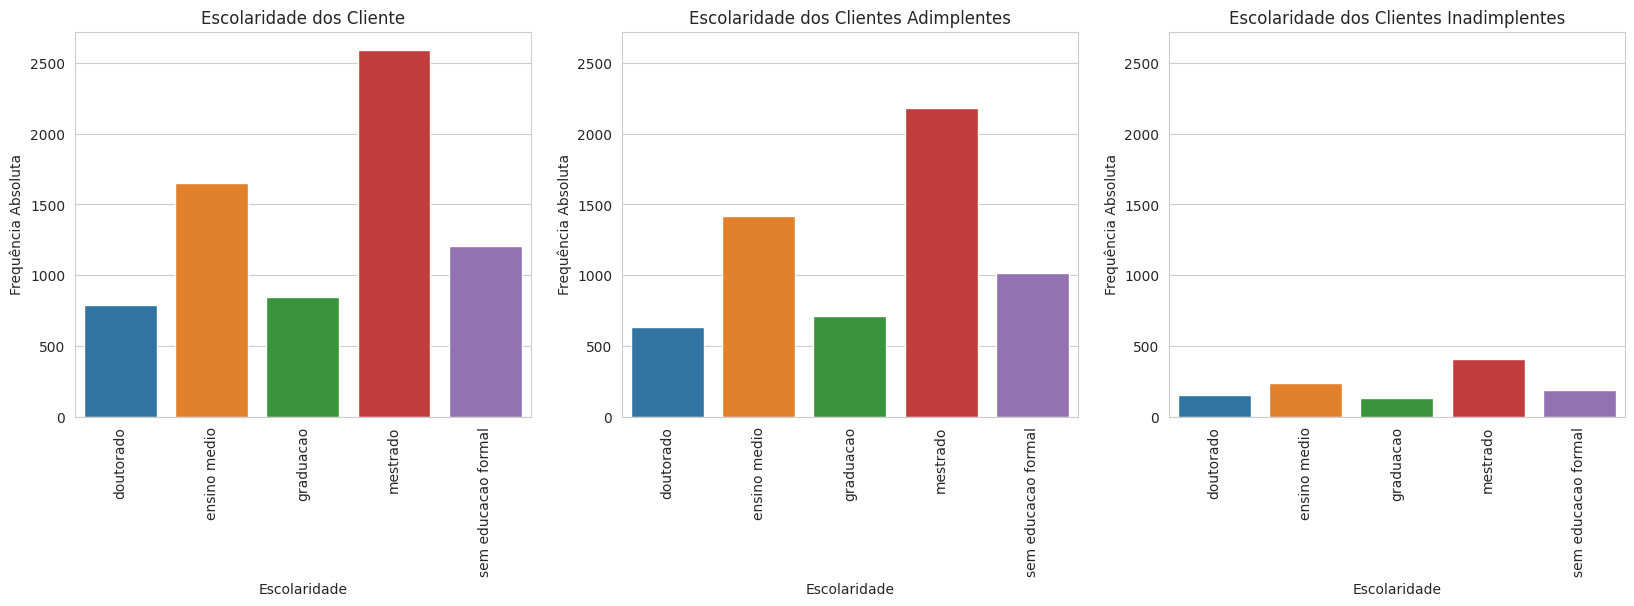

In [30]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Cliente', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

figura.show()

**Sobre os gráficos acima**

O intuito de criar esses gráficos era analisar se a variável **'escolaridade'** tinha algum tipo de relação com a resposta a ser respondida, entretanto o desenho formado dos três gráficos são praticamentes idênticos, sendo diferente apenas no valor da frequência absoluta, o que não agrega valor para responder a nossa pergunta.




*   Salário Anual



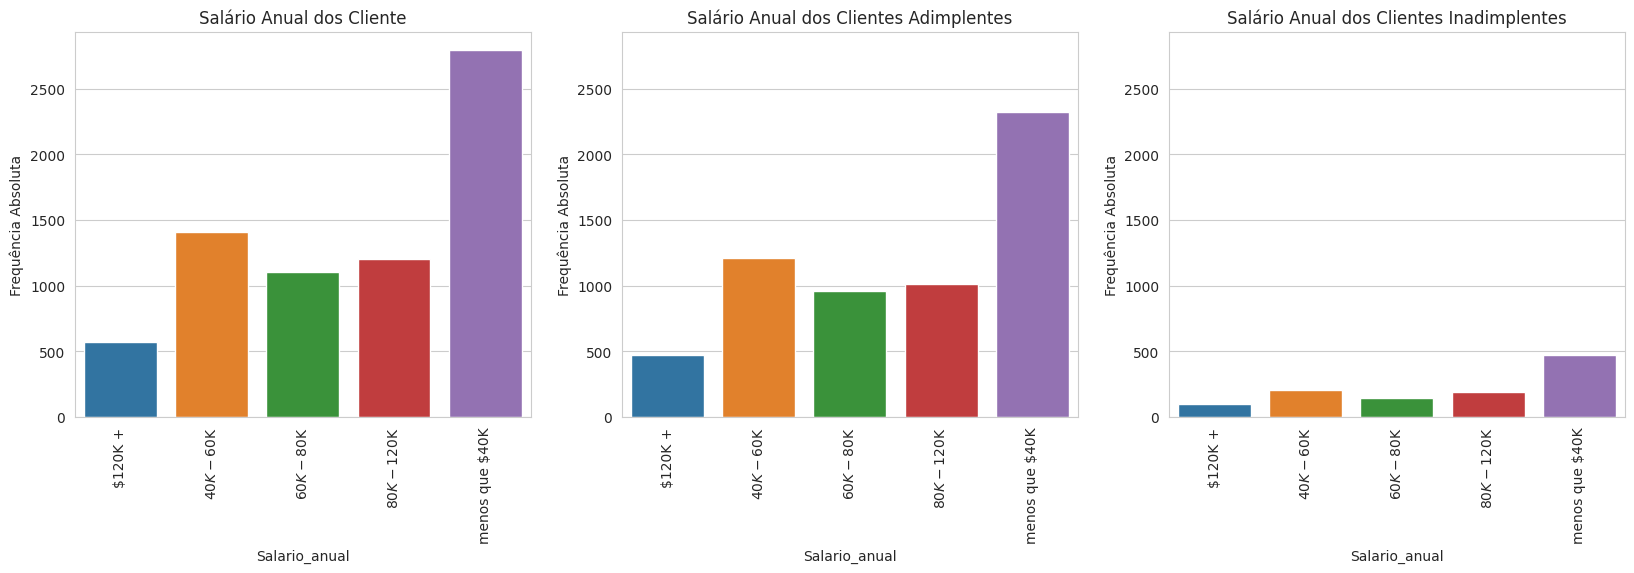

In [31]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Cliente', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

figura.show()

**Sobre os gráficos acima**

Ao analisar os três gráficos acima cheguei a conclusão que o salário anual não está associado á inadimplencia dos clientes, pois os mesmos obtiveram um desenho praticamente iguais, só sendo diferente no número da frequência absoluta.



*   Visualizações numéricas, ou seja, vamos visualizar a relação entre a variável da resposta default com os atributos numéricos.



In [32]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24




*   Verificando se a quantidade de transações nos últimos 12 meses dos clientes tem algum tipo de relação com o número de inadimplência.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


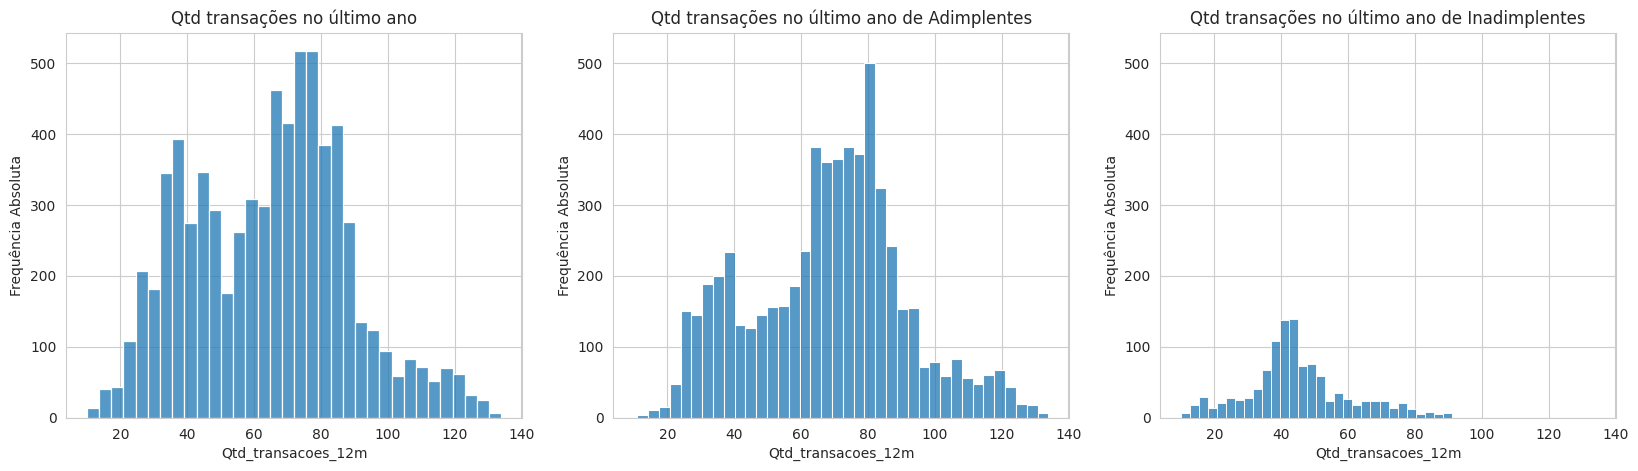

In [33]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd transações no último ano', 'Qtd transações no último ano de Adimplentes', 'Qtd transações no último ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Sobre os gráficos acima**

Ao analisar os resultados, cheguei a conclusão que o dado de 'Quantidade de transações realizadas no último ano' tem sim uma relação direta com os clientes inadimplentes, pois os valores se concentram em **40**, respondendo assim que os clientes que tem uma média de 40 transações por ano tem uma maior probabilidade de ser ou de tornar-se um inadimplente.



*   Verificando o valor das transações feitas nos últimos 12 meses.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


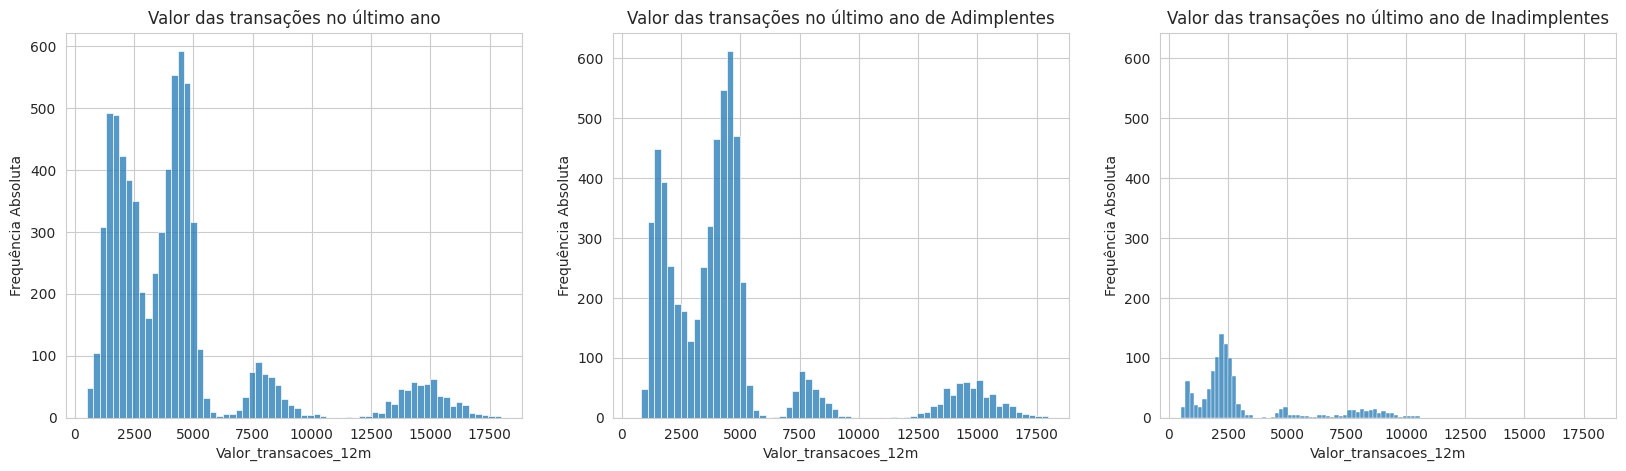

In [34]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das transações no último ano', 'Valor das transações no último ano de Adimplentes', 'Valor das transações no último ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Sobre os gráficos acima**

Ao analisar os resultados acima, cheguei a seguinte conclusão: Que os clientes que tem um valor médio de transação no ano de **0 á 2500** com o pico deles sendo **2500** tendem ser ou torna-lós inadimplentes.



*   Será que a **Idade** pode gerar alguma relação com a Inadimplência dos clientes?



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


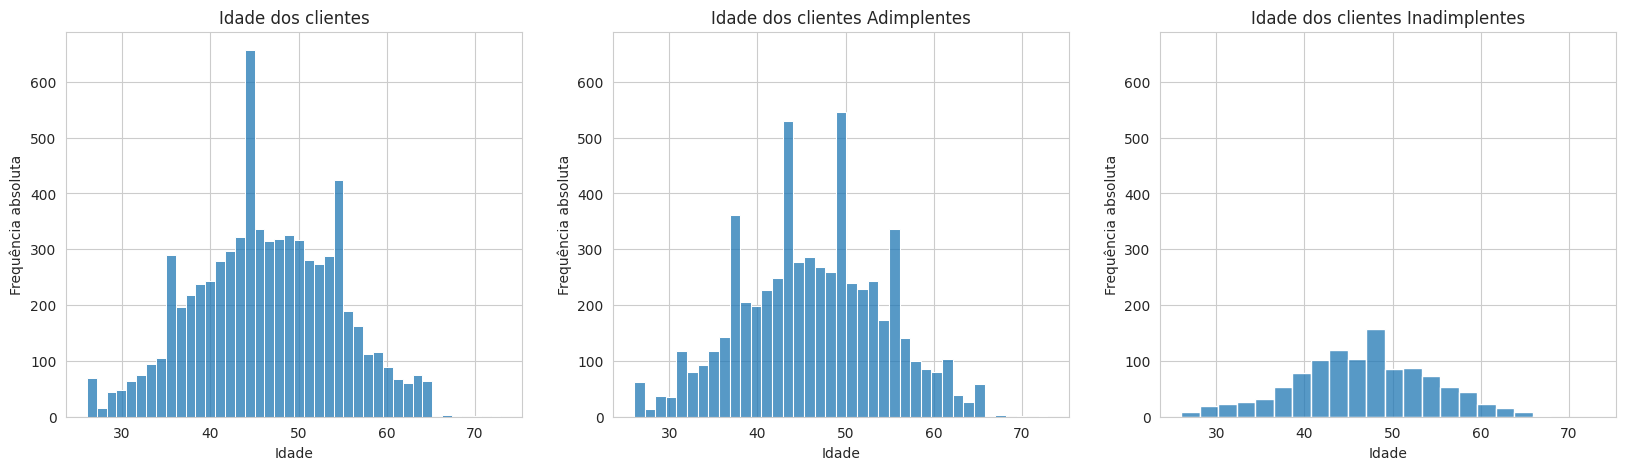

In [35]:
coluna = 'idade'
titulos = ['Idade dos clientes', 'Idade dos clientes Adimplentes', 'Idade dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Sobre os gráficos acima**

Surpreendentemente, os resultados obtidos são bastante intrigantes. Antes de criar esses gráficos, eu presumia que os clientes mais jovens seriam os mais propensos a se tornarem inadimplentes. No entanto, os dados revelam o contrário: em média, pessoas entre 40 e 50 anos têm maior tendência a se tornarem inadimplentes, com o pico próximo aos **50 anos de idade**.

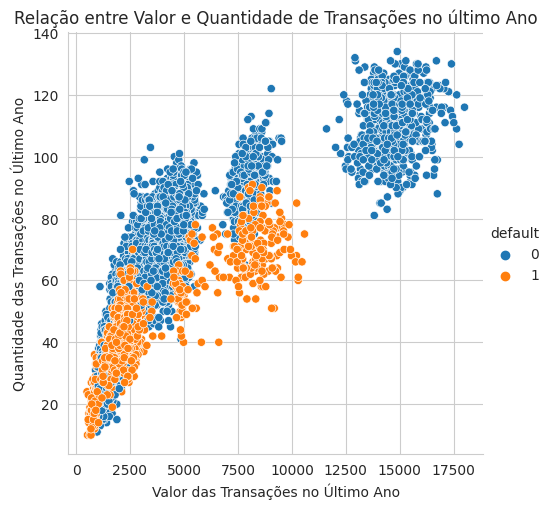

In [36]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)

**Sobre o gráfico acima**

Após obter os dados para uma visualização individual, e assim relacionar posteriormente, chegamos a seguinte conclusão: Clientes que tem um valor alto nas transações (acima de 12500) e em média acima de 80 transações por um ano, tendem a ser adimplentes. Entretanto o maior indice de inadimplência fica concentrado em dois grupos, o primeiro no valor de (7500 á 10000) e de (60 á 80 transações por ano) e o segundo grupo fica concentrado no valor de (0 á 2500) e de (20 á 60 transações por ano). Por fim, isso significa que os clientes nessa faixa de valores devem ter um olhar mais atento por agências bancárias.



*  A próxima relação de dados á ser analisada é referente á idade com a quantidade de inadimplência, em outras palavras será que o perfil de um jovem tende ser mais propicio a torna-se um inadimplente, ou uma pessoa mais velha tende a ter esse comportamento?





# 8. Resumo dos insights

Em suma, ao analisar os dados, identificamos diversos pontos que contribuem para a inadimplência dos clientes:

- Inicialmente, descartamos as hipóteses relacionadas à escolaridade e ao salário anual, pois não apresentaram influência significativa sobre a inadimplência.

- Um dos principais fatores que explicam a alta taxa de inadimplência é a quantidade de transações realizadas ao longo de um ano. Observamos que a maioria dos casos de inadimplência ocorre entre clientes que realizam em torno de 40 transações anuais, indicando a necessidade de monitoramento mais próximo por parte das instituições bancárias.

- Além disso, o valor das transações também está diretamente relacionado à inadimplência, especialmente aquelas que variam de 0 a 2500 reais. Isso sugere que clientes que realizam esse tipo de transação devem ser monitorados de perto, já que podem representar um risco para as agências bancárias.

- Surpreendentemente, a idade também desempenha um papel significativo na inadimplência. Contrariando a expectativa inicial, constatamos que, em média, pessoas entre 40 e 50 anos apresentam maior propensão a se tornarem inadimplentes, com o pico ocorrendo próximo aos 50 anos de idade.

- Por fim, para criar um perfil de clientes inadimplentes, identificamos um padrão de dados que ajuda a estabelecer esse perfil: clientes que realizam transações de alto valor (acima de 12500 reais) e em média mais de 80 transações por ano tendem a ser adimplentes. No entanto, a maior incidência de inadimplência concentra-se em dois grupos: o primeiro com transações entre 7500 e 10000 reais e entre 60 e 80 transações por ano, e o segundo com transações entre 0 e 2500 reais e entre 20 e 60 transações por ano. Isso indica que os clientes nessas faixas de valores requerem uma atenção especial por parte das agências bancárias.